In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [110]:
df = pd.read_csv('census2011.csv')
# Preprocessing


In [111]:
df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


         State  Population
0  Maharashtra    11060148
1  West Bengal    10009781
2    Karnataka     9621551
3  Maharashtra     9429408
4  Maharashtra     9356962
5  West Bengal     8161961
6  West Bengal     7717563
7      Gujarat     7214225
8  West Bengal     7103807
9    Rajasthan     6626178
                          State  Population
0   Andaman and Nicobar Islands      380581
1                Andhra Pradesh    67459740
2             Arunachal Pradesh     1383727
3                         Assam    28381808
4                         Bihar    89751364
5                    Chandigarh     1055450
6                  Chhattisgarh    25545198
7        Dadra and Nagar Haveli      343709
8                 Daman and Diu      243247
9                         Delhi    14056012
10                          Goa     1458545
11                      Gujarat    54816245
12                      Haryana    25351462
13             Himachal Pradesh     6864602
14            Jammu and Kashmir    12541302

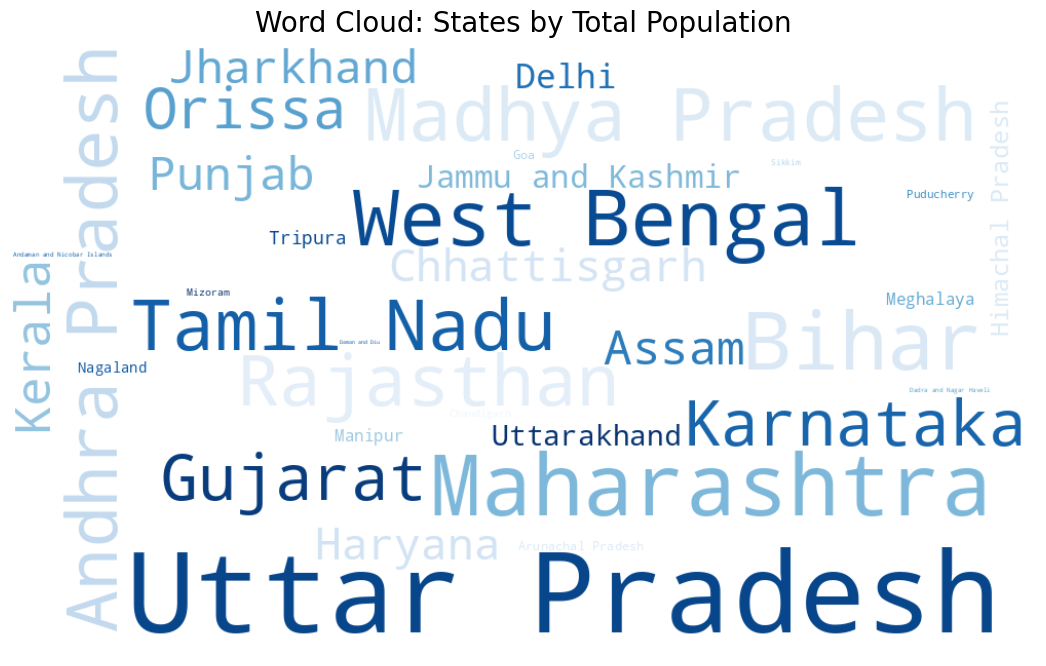

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
df = pd.read_csv('census2011.csv')

# Cleaning the Population column
def clean_population_value(value):
    # Remove any non-numeric characters and convert to integer
    value = ''.join(filter(str.isdigit, str(value)))
    return int(value) if value else 0

# Apply the cleaning function to the Population column
df['Population'] = df['Population'].apply(clean_population_value)

# Check the cleaned data
print(df[['State', 'Population']].head(10))

# Aggregate the population by state
state_population = df.groupby('State')['Population'].sum().reset_index()

# Check the aggregated population data
print(state_population)

# Create a dictionary with states as keys and total population as values
word_freq = {row['State']: row['Population'] for index, row in state_population.iterrows()}

# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='Blues',
    normalize_plurals=False
).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: States by Total Population", fontsize=20)
plt.show()


**Obeservation :- Uttar Pradesh has Highest Population**

<ipython-input-43-6887bcd7aa55>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="State", y="Literacy", data=df, palette="Set2")


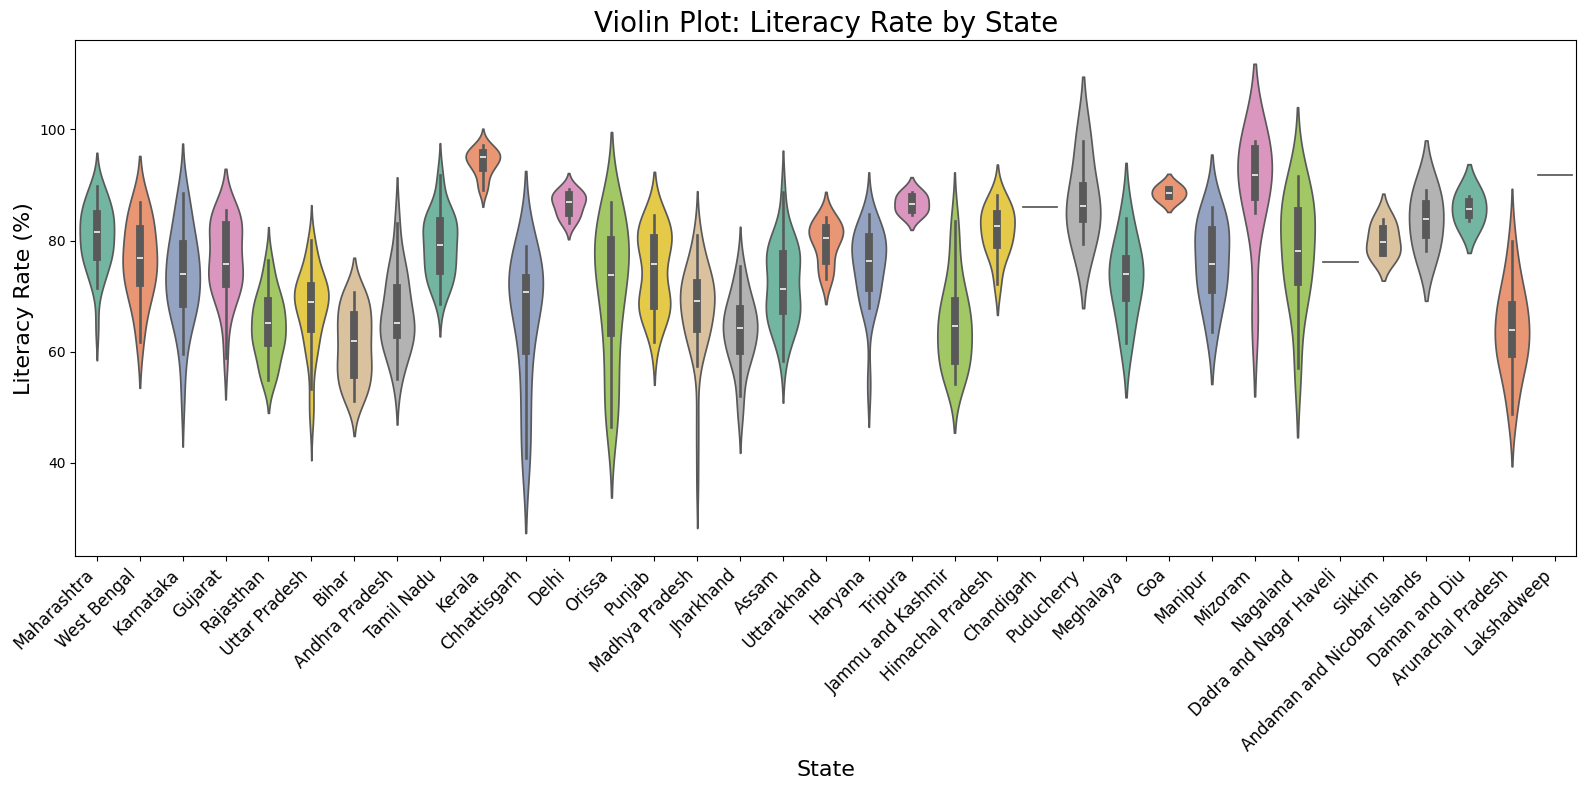

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the Violin Plot
plt.figure(figsize=(16, 8))  # Increase the figure size for better readability
sns.violinplot(x="State", y="Literacy", data=df, palette="Set2")

# Title and labels
plt.title("Violin Plot: Literacy Rate by State", fontsize=20)
plt.xlabel("State", fontsize=16)
plt.ylabel("Literacy Rate (%)", fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate labels 45 degrees and align to the right

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


**Observation :- Show States having Lowest and Highest literacy Rates**

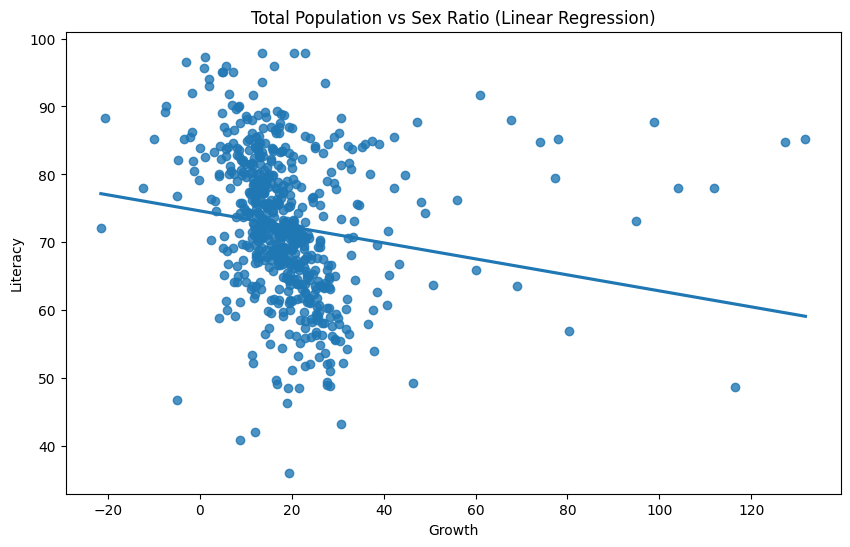

In [89]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('census2011.csv')

# Convert 'Growth' to string type first, then remove '%' and convert to float
df['Growth'] = df['Growth'].astype(str).str.replace('%', '').astype(float)

# Fit the linear regression model
X = df['Growth']
y = df['Literacy']

plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, ci=None)
plt.title('Total Population vs Sex Ratio (Linear Regression)')
plt.show()


**Oberservation :- As population Increases Literacy Rate goes down**

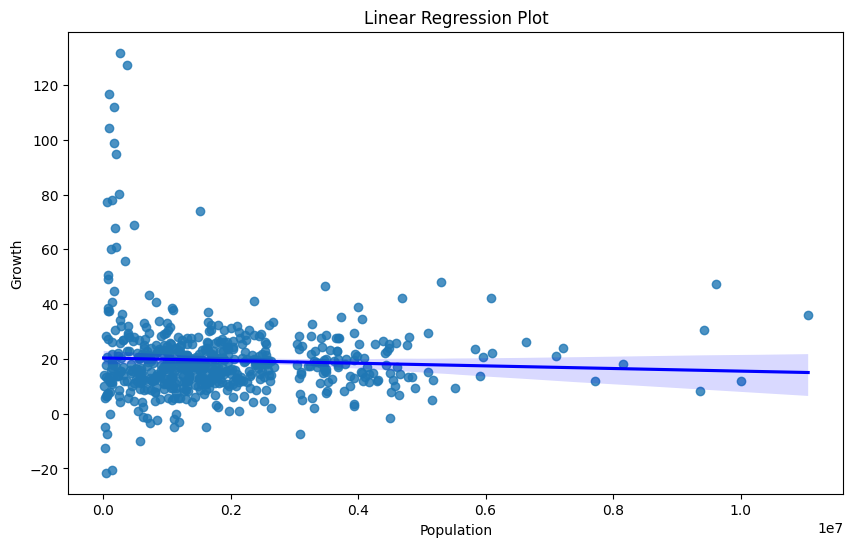

In [46]:
# Linear Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Population', y='Growth', data=df, line_kws={'color': 'blue'})
plt.title('Linear Regression Plot')
plt.xlabel('Population')
plt.ylabel('Growth')
plt.show()

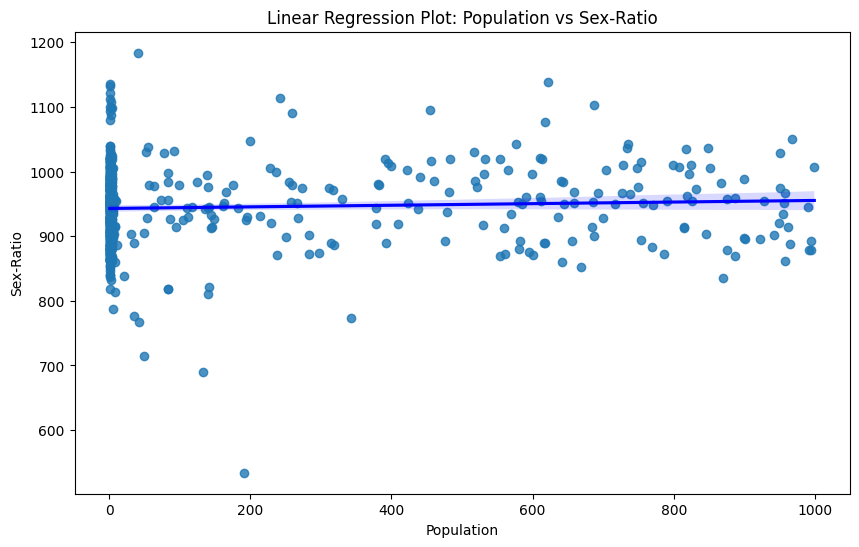

In [101]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Population', y='Sex-Ratio', data=df, line_kws={'color': 'blue'})
plt.title('Linear Regression Plot: Population vs Sex-Ratio')
plt.xlabel('Population')
plt.ylabel('Sex-Ratio')
plt.show()

**Observation :- Sex-Ratio is stable as the population incresing and decreasing**

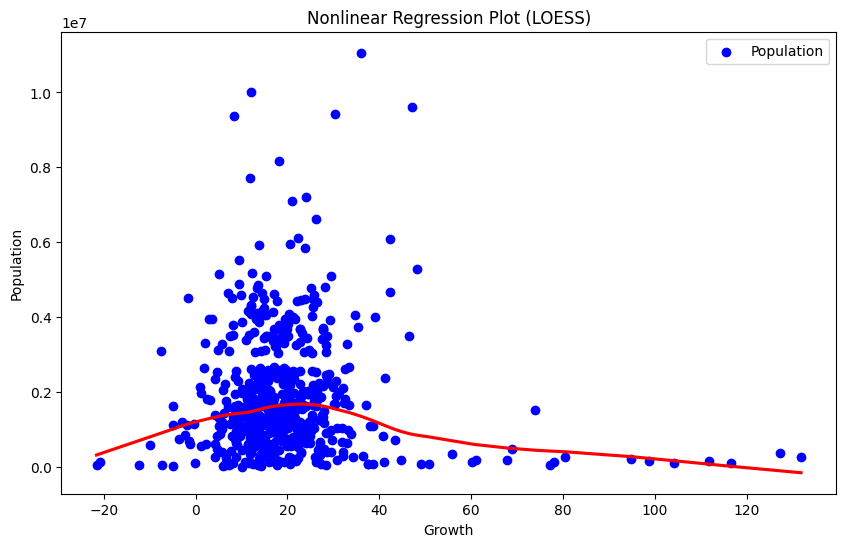

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('census2011.csv')

# Convert 'Growth' to a numeric type after cleaning
df['Growth'] = df['Growth'].astype(str).str.replace('%', '').astype(float)

# Convert 'Population' to a numeric type, cleaning up any commas
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)

# Plot the points with different colors
plt.figure(figsize=(10, 6))
plt.scatter(df['Growth'], df['Population'], color='blue', label='Population')

# Overlay the LOESS regression line
sns.regplot(x='Growth', y='Population', data=df, lowess=True, scatter=False, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Nonlinear Regression Plot (LOESS)')
plt.xlabel('Growth')
plt.ylabel('Population')

# Add legend to differentiate between the points and the LOESS line
plt.legend()

# Show the plot
plt.show()


In [107]:

# 3D Chart
fig = px.scatter_3d(df, x='Population', y='Growth', z='Literacy', color='State', symbol='State')
fig.update_layout(title='3D Scatter Plot')
fig.show()


**Observation :- Show Relationship between the Literacy, Growth and Population**

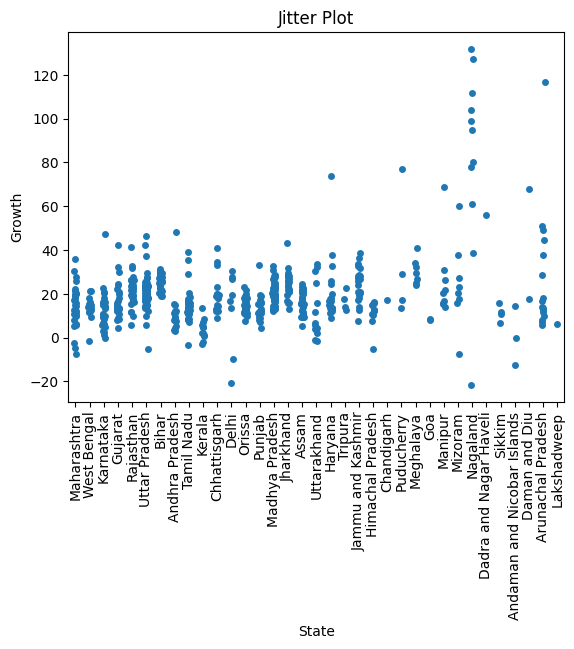

In [54]:
# Jitter Plot
sns.stripplot(x='State', y='Growth', data=df, jitter=True)
plt.title('Jitter Plot')
plt.xlabel('State')
plt.ylabel('Growth')
plt.xticks(rotation=90)
plt.show()


**Obseravation :- Growth is higher in state of Mizoram**

<ipython-input-61-a6b8524c8b08>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



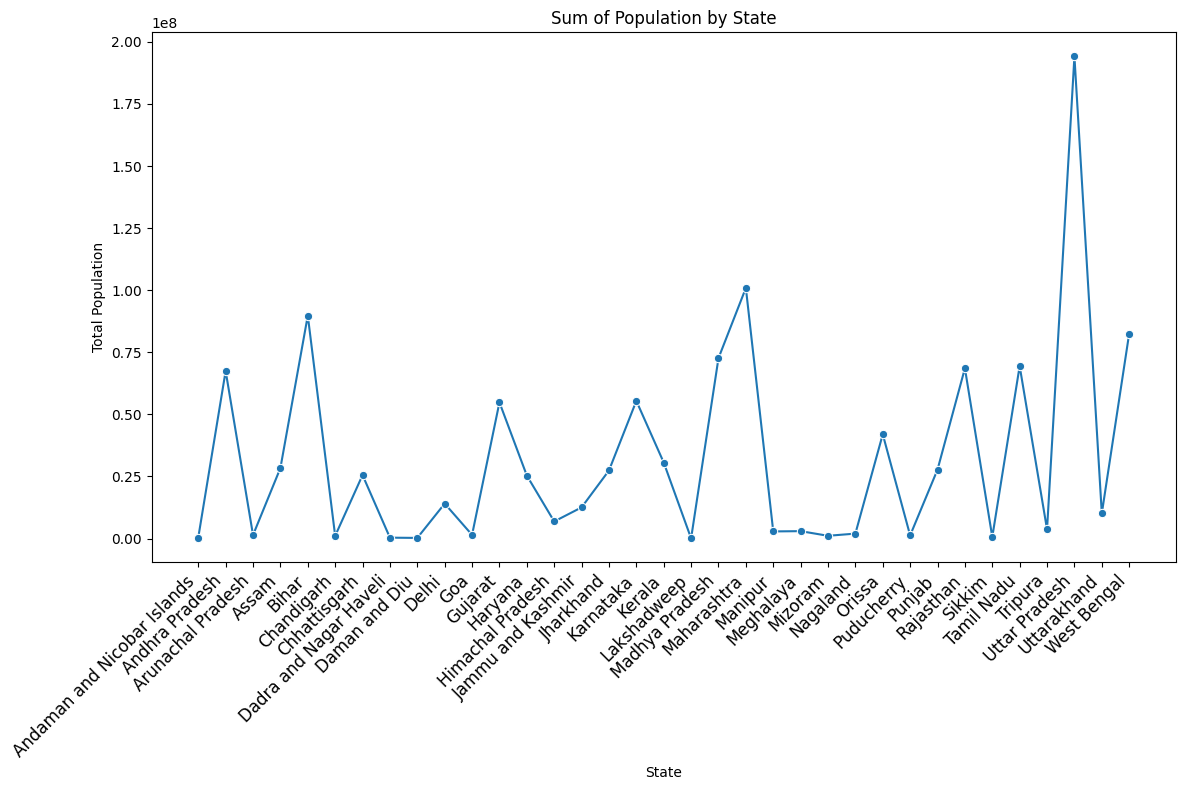

In [61]:
# Aggregate the population by state
state_population = df.groupby('State')['Population'].sum().reset_index()

# Line Plot of Population by State
plt.figure(figsize=(12, 8))
sns.lineplot(data=state_population, x='State', y='Population', marker='o', palette='tab10')
plt.title('Sum of Population by State')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate labels 90 degrees and align to the right

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

**Population in Uttar Pradesh is highesh**

<ipython-input-66-dd73649cb5ed>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



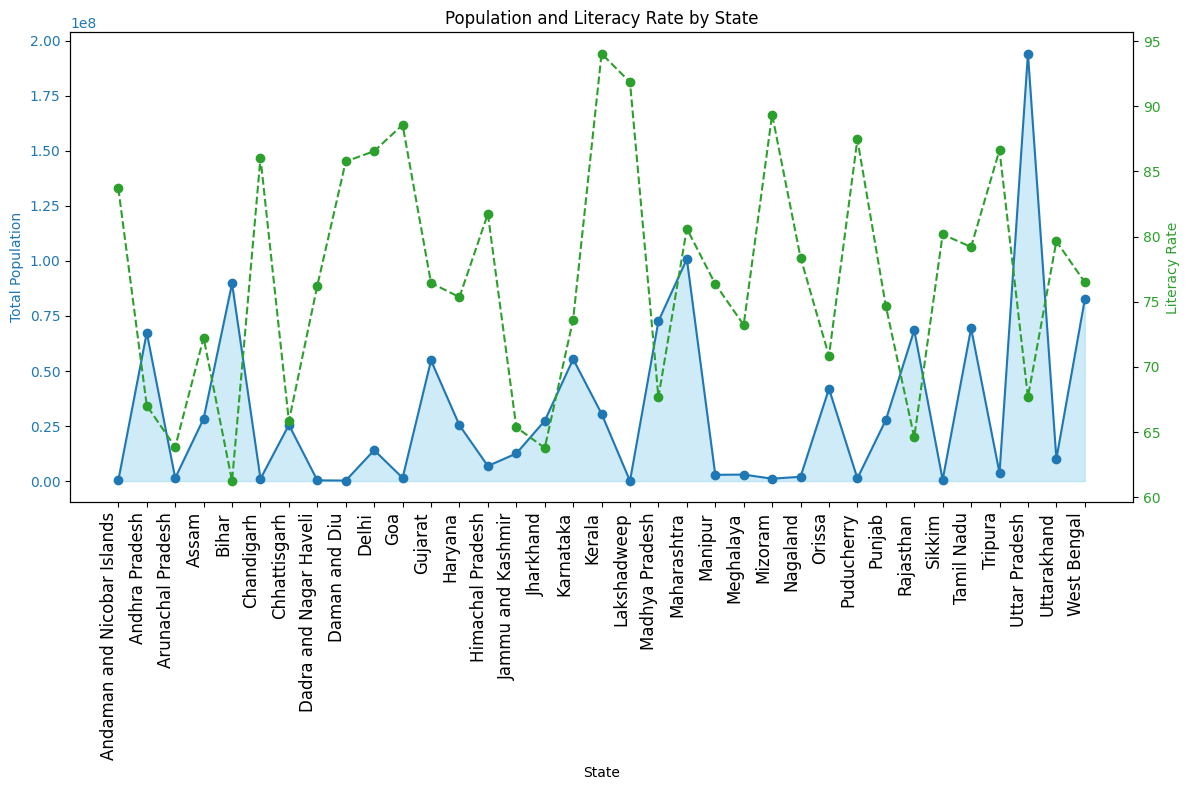

In [66]:
# Aggregate the population and literacy rate by state
state_data = df.groupby('State').agg({'Population': 'sum', 'Literacy': 'mean'}).reset_index()

# Sort DataFrame by State for better visualization
state_data = state_data.sort_values(by='State')

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot for Population
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Total Population', color=color)
ax1.plot(state_data['State'], state_data['Population'], marker='o', color=color, label='Population')
ax1.fill_between(state_data['State'], state_data['Population'], color='skyblue', alpha=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(state_data['State'], rotation=90, ha='right', fontsize=12)

# Create a second y-axis for Literacy
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Literacy Rate', color=color)
ax2.plot(state_data['State'], state_data['Literacy'], marker='o', color=color, linestyle='--', label='Literacy Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
plt.title('Population and Literacy Rate by State')
fig.tight_layout()  # Adjust layout to fit everything

# Show the plot
plt.show()

**Literacy Rate in the Karnataka is Highest**

In [69]:
# Waterfall Chart
fig = go.Figure(go.Waterfall(
    x=df['District'],
    y=df['Population'],
    measure=["relative"] * len(df),
    text=df['Population'].apply(lambda x: f'{x:,}'),
    textposition="outside"
))
fig.update_layout(title='Waterfall Chart of Population by District')
fig.show()

In [70]:
# Create a composite metric
df['Composite'] = (df['Population'] * 0.1 + df['Literacy'] * 0.1 +
                   df['Sex-Ratio'] * 0.1 + df['Growth'])  # Adjust weights as needed

# Waterfall Chart
fig = go.Figure(go.Waterfall(
    x=df['District'],
    y=df['Composite'],
    measure=["relative"] * len(df),
    text=df[['Population', 'Literacy', 'Sex-Ratio', 'Growth']].apply(
        lambda row: f"Pop: {row['Population']:,}, Lit: {row['Literacy']:.2f}, Sex: {row['Sex-Ratio']}, Growth: {row['Growth']:.2f}%",
        axis=1),
    textposition="outside"
))

fig.update_layout(title='Composite Waterfall Chart of Population, Literacy Rate, Sex Ratio, and Growth by District')
fig.show()

In [78]:
state_growth = df.groupby('State')['Growth'].mean().reset_index()

# Create Donut Chart
fig = px.pie(state_growth,
             names='State',
             values='Growth',
             hole=0.3,
             title='Donut Chart of Average Growth by State',
             labels={'Growth': 'Average Growth (%)'},
             color='State')

# Update hover information
fig.update_traces(
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Average Growth: %{value:.2f}%<extra></extra>'
)

fig.show()

**Obseravation :- Nagaland Has highest growth percentage 82.2%**

In [74]:
# Treemap
fig = px.treemap(df, path=['State', 'District'], values='Population', title='Treemap of Population by State and District')
fig.show()

**Observation :- States and Their District in the dataset**

In [81]:
# Aggregate the total population by state
state_population = df.groupby('State')['Population'].sum().reset_index()

# Sort states by total population for funnel effect
state_population = state_population.sort_values(by='Population', ascending=False)

# Create Funnel Chart
fig = px.funnel(state_population,
                x='Population',
                y='State',
                title='Funnel Chart of Total Population by State')

# Update layout for funnel appearance
fig.update_layout(
    xaxis_title='Total Population',
    yaxis_title='State',
    yaxis=dict(
        title='State',
        autorange='reversed'
    )
)

# Show the plot
fig.show()

**Obseravation :- Uttar Pradesh Has Highest Population**